In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Loading data
data=pd.read_csv('uber_nyc_enriched.csv')

In [ ]:
# feature description
# pickup_dt: Time period of the observations.
# borough: NYC's borough.
# pickups: Number of pickups for the period.
# spd: Wind speed in miles/hour.
# vsb: Visibility in Miles to nearest tenth.
# temp: temperature in Fahrenheit.
# dewp: Dew point in Fahrenheit.
# slp: Sea level pressure.
# pcp01: 1-hour liquid precipitation.
# pcp06: 6-hour liquid precipitation.
# pcp24: 24-hour liquid precipitation.
# sd: Snow depth in inches.
# hday: Being a holiday (Y) or not (N).
data.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


In [ ]:
# data preprocessing
data=data.dropna(axis=0) # Drop NAN values

In [ ]:
description = data.describe() # descriptive summary of the dataset
print(description)

            pickups           spd           vsb          temp          dewp  \
count  26058.000000  26058.000000  26058.000000  26058.000000  26058.000000   
mean     547.222082      6.000039      8.820027     47.489005     30.654434   
std     1037.307748      3.706328      2.442995     19.772156     21.241521   
min        0.000000      0.000000      0.000000      2.000000    -16.000000   
25%        1.000000      3.000000      9.100000     31.500000     14.000000   
50%       86.000000      6.000000     10.000000     45.000000     30.000000   
75%      506.000000      8.000000     10.000000     64.000000     49.000000   
max     7883.000000     21.000000     10.000000     89.000000     73.000000   

                slp         pcp01         pcp06         pcp24            sd  
count  26058.000000  26058.000000  26058.000000  26058.000000  26058.000000  
mean    1017.812802      0.003821      0.026074      0.091036      2.536496  
std        7.783471      0.018834      0.092916      0

In [ ]:
types=data.dtypes
types

pickup_dt     object
borough       object
pickups        int64
spd          float64
vsb          float64
temp         float64
dewp         float64
slp          float64
pcp01        float64
pcp06        float64
pcp24        float64
sd           float64
hday          object
dtype: object

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


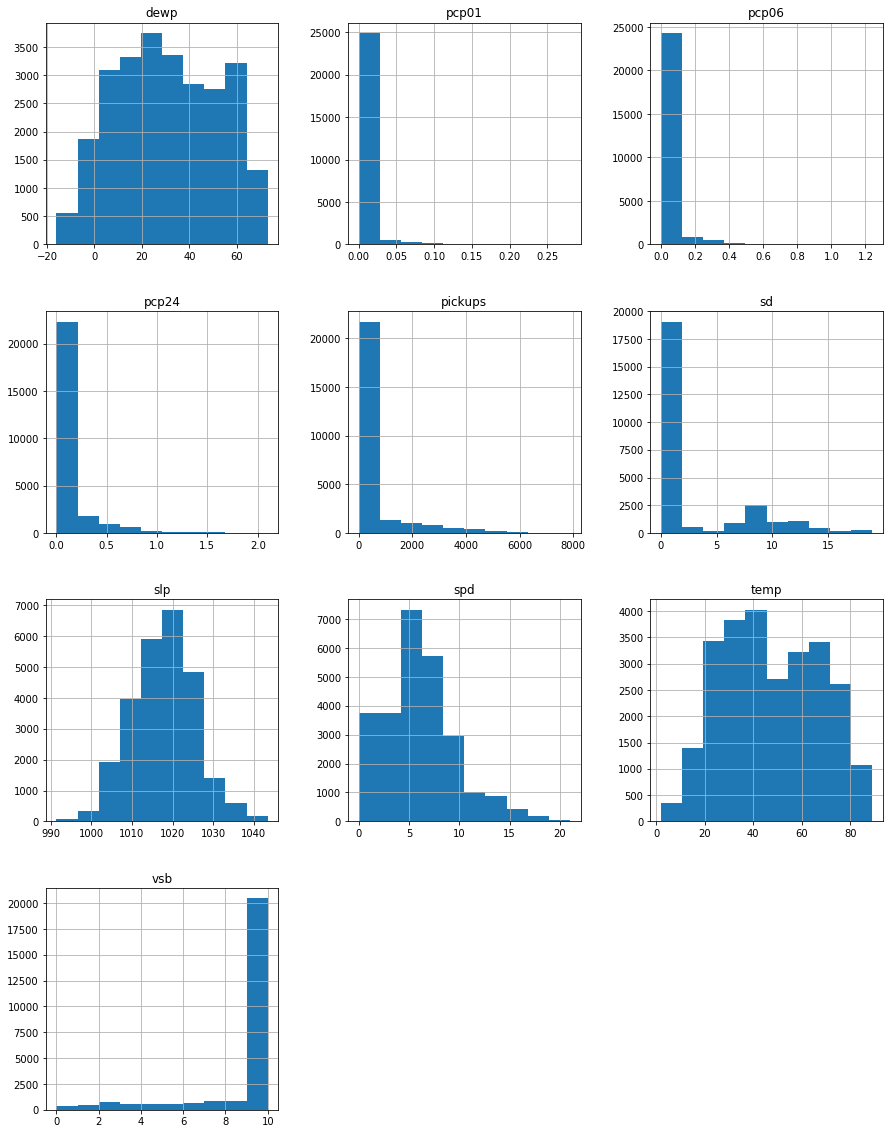

In [ ]:
# Have a look at the data distribution
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.savefig('Overview.png')

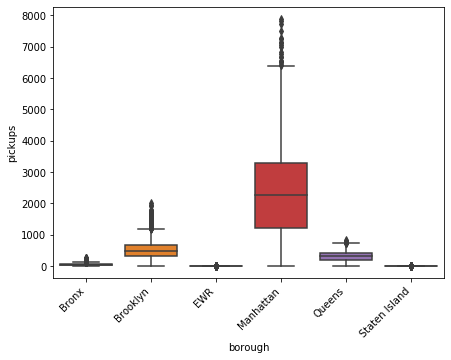

In [ ]:
# Get the relation between Pickups and two categorical features
plt.figure(figsize=(7,5))
ax=sns.boxplot(x='borough', y='pickups',data=data)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

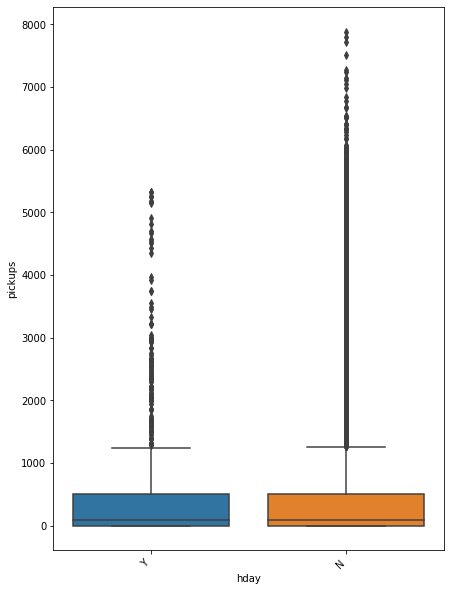

In [ ]:
# Get the relation between Pickups and two categorical features
plt.figure(figsize=(7,10))
ax=sns.boxplot(x='hday', y='pickups',data=data)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Maybe we can drop two of the precipitation columns and only keep one. I suggest picking the 6hour one.

### Feature engineering

In [ ]:
data_norm=data.copy()
# Convert Hday column to 1 and 0
data_norm['hday']=data_norm['hday'].astype(str)
# data_norm['hday'].values
data_norm['hday'] = np.where(data_norm['hday'].values == 'Y',1,0)

In [ ]:
data_norm.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
1,2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
2,2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
3,2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1
4,2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1


In [ ]:
# One hot encoding Borough column
bor_dums = pd.get_dummies(data_norm['borough'])

In [ ]:
# Add dummies to the main dataframe
data_norm = pd.concat([data_norm,bor_dums],axis=1)

In [ ]:
# Drop the original feature
data_norm.drop(['borough'],1)

,pickup_dt,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
0,2015-01-01 01:00:00,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0
1,2015-01-01 01:00:00,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0
2,2015-01-01 01:00:00,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0
3,2015-01-01 01:00:00,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0
4,2015-01-01 01:00:00,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0
5,2015-01-01 01:00:00,6,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1
7,2015-01-01 02:00:00,120,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,1,1,0,0,0,0,0
8,2015-01-01 02:00:00,1229,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0
9,2015-01-01 02:00:00,0,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0
10,2015-01-01 02:00:00,4345,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0


In [ ]:
# Convert pickup_dt to date and time
data_norm['date'], data_norm['time'] = data_norm['pickup_dt'].str.split(' ', 1).str

In [ ]:
# Create day and month from date
data_norm['date'] = pd.to_datetime(data_norm['date'])
data_norm['day'] = data_norm['date'].dt.day
data_norm['month'] = data_norm['date'].dt.month

In [ ]:
# Convert time to categorical feature 1-8
# 1am-3am to 1, 4am to 6am to 2, etc.
hour_values=data_norm['time'].unique().tolist()
print(hour_values)

['01:00:00', '02:00:00', '03:00:00', '04:00:00', '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00', '23:00:00', '00:00:00']


In [ ]:
data_norm['time']=data_norm['time'].astype(str)
data_norm.loc[(data_norm.time == '01:00:00'), 'range']=1
data_norm.loc[(data_norm.time == '02:00:00'), 'range']=1
data_norm.loc[(data_norm.time == '03:00:00'), 'range']=1
data_norm.loc[(data_norm.time == '04:00:00'), 'range']=2
data_norm.loc[(data_norm.time == '05:00:00'), 'range']=2
data_norm.loc[(data_norm.time == '06:00:00'), 'range']=2
data_norm.loc[(data_norm.time == '07:00:00'), 'range']=3
data_norm.loc[(data_norm.time == '08:00:00'), 'range']=3
data_norm.loc[(data_norm.time == '09:00:00'), 'range']=3
data_norm.loc[(data_norm.time == '10:00:00'), 'range']=4
data_norm.loc[(data_norm.time == '11:00:00'), 'range']=4
data_norm.loc[(data_norm.time == '12:00:00'), 'range']=4
data_norm.loc[(data_norm.time == '13:00:00'), 'range']=5
data_norm.loc[(data_norm.time == '14:00:00'), 'range']=5
data_norm.loc[(data_norm.time == '15:00:00'), 'range']=5
data_norm.loc[(data_norm.time == '16:00:00'), 'range']=6
data_norm.loc[(data_norm.time == '17:00:00'), 'range']=6
data_norm.loc[(data_norm.time == '18:00:00'), 'range']=6
data_norm.loc[(data_norm.time == '19:00:00'), 'range']=7
data_norm.loc[(data_norm.time == '20:00:00'), 'range']=7
data_norm.loc[(data_norm.time == '21:00:00'), 'range']=7
data_norm.loc[(data_norm.time == '22:00:00'), 'range']=8
data_norm.loc[(data_norm.time == '23:00:00'), 'range']=8
data_norm.loc[(data_norm.time == '00:00:00'), 'range']=8

In [ ]:
data_norm['range']=data_norm['range'].astype(int)

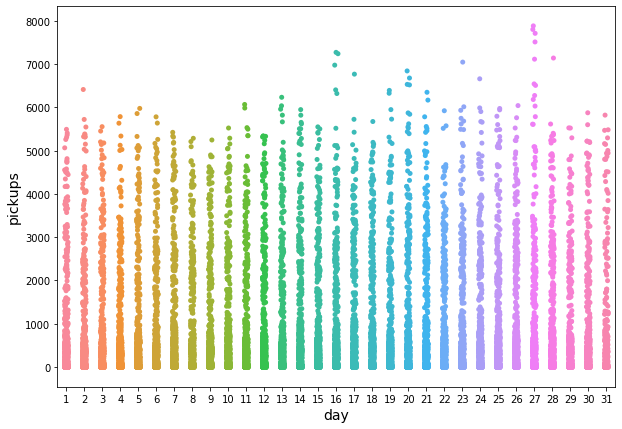

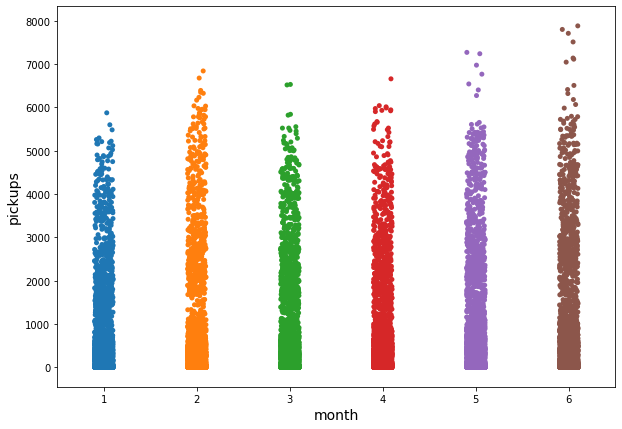

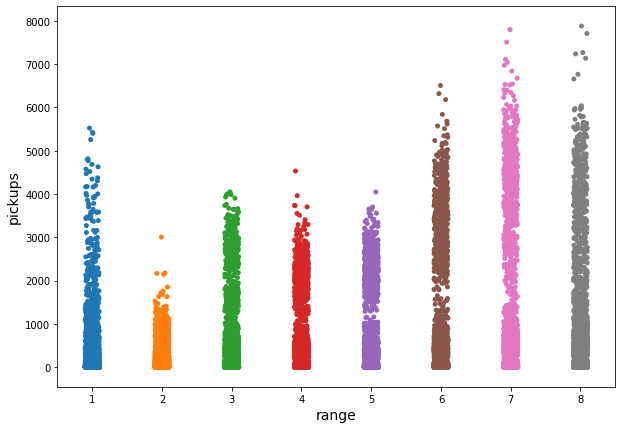

In [ ]:
# Visualize day, month, range-pickups
time_feature=['day', 'month', 'range']
for i in time_feature:
    plt.figure(figsize=(10,7))
    ax=sns.stripplot(x=i, y='pickups', data=data_norm)
    plt.xlabel(i, fontsize=14)
    plt.ylabel('pickups', fontsize=14)
    plt.show()

### Split data and normalize

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import math

#Data not including date features
df_baseline=data_norm.iloc[:, 2:]
df_baseline=df_baseline.drop(['date', 'time'], 1)

# X = df_baseline.drop(['pickups'],axis=1)
# Y = df_baseline['pickups']
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8,test_size=0.2, random_state=1)

# X_train, X_val, Y_train, Y_val  = train_test_split(X_train, Y_train, test_size=0.25, random_state=1)

# train,test = train_test_split(df_baseline, train_size=0.8,test_size=0.2, random_state=1)

# train,val = train_test_split(train, train_size=0.8,test_size=0.2, random_state=1)

train = df_baseline[:math.ceil(df_baseline.shape[0]*0.8)]
test = df_baseline[math.ceil(df_baseline.shape[0]*0.8)+1 : -1]
train,val = train_test_split(train, train_size=0.8,test_size=0.2, random_state=1)

In [ ]:
#Select columns need to be normalized
num_col = list(set(df_baseline.columns) - set(['hday', 'Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'day', 'month', 'range']))
train_num = train[num_col]
val_num=val[num_col]
test_num=test[num_col]

#Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
train_num_norm = scaler.fit_transform(train_num)
val_num_norm = scaler.transform(val_num)
test_num_norm = scaler.transform(test_num)

In [ ]:
#Convert np.darray to Df
train_num_norm_df = pd.DataFrame(train_num_norm, index=train_num.index, columns=train_num.columns)
val_num_norm_df = pd.DataFrame(val_num_norm, index=val_num.index, columns=val_num.columns) 
test_num_norm_df = pd.DataFrame(test_num_norm, index=test_num.index, columns=test_num.columns) 

#Update the whole dataset
train.update(train_num_norm_df)
val.update(val_num_norm_df)
test.update(test_num_norm_df)

#Split X and Y set
X_train = train.drop(['pickups'],axis=1)
Y_train = train['pickups']
X_val = val.drop(['pickups'],axis=1)
Y_val = val['pickups']
X_test = test.drop(['pickups'],axis=1)
Y_test = test['pickups']

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


### Baseline_linear_regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import *
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
# Fit the baseline model with date features
#First round regression

X_train1 = sm.add_constant(X_train)
lr1 = sm.OLS(Y_train,X_train1).fit()

X_test1 = sm.add_constant(X_test)
Y_pred = lr1.predict(X_test1) 

display(lr1.summary())

# calculate MAE, MSE, RMSE
print('MAE: ',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))



//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pickups   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2172.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        18:59:33   Log-Likelihood:                 19352.
No. Observations:               16677   AIC:                        -3.867e+04
Df Residuals:                   16658   BIC:                        -3.852e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0036      0.005      0.734      0.463      -0.006       0.013
spd               0.0037      0.004      1.027      0.305      -0.003       0.011
vsb               0.0001      0.003      0.044      0.965      -0.006       0.007
temp              0.0002      0.008      0.022      0.982      -0.016       0.016
dewp             -0.0156      0.007     -2.258      0.024      -0.029      -0.002
slp              -0.0071      0.004     -1.649      0.099      -0.016       0.001
pcp01             0.0063      0.012      0.524      0.600      -0.017       0.030
pcp06             0.0141      0.009      1.603      0.109      -0.003       0.031
pcp24            -0.0405      0.006     -6.447      0.000      -0.053      -0.028
sd                0.0097      0.003      3.450      0.001       0.004       0.015
hday              0.0004      0.003      0.136      0.892      -0.006       0.006
Bronx            -0.0650      0.002    -42.055      0.000      -0.068      -0.062
Brooklyn         -0.0026      0.002     -1.688      0.091      -0.006       0.000
EWR              -0.0713      0.002    -46.297      0.000      -0.074      -0.068
Manhattan         0.2455      0.002    159.520      0.000       0.243       0.249
Queens           -0.0321      0.002    -20.825      0.000      -0.035      -0.029
Staten Island    -0.0710      0.002    -45.962      0.000      -0.074      -0.068
day               0.0004   7.41e-05      4.946      0.000       0.000       0.001
month             0.0058      0.001      7.902      0.000       0.004       0.007
range             0.0122      0.000     44.816      0.000       0.012       0.013
==============================================================================
Omnibus:                     5920.602   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80645.383
Skew:                           1.323   Prob(JB):                         0.00
Kurtosis:                      13.443   Cond. No.                     1.92e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.48e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

MAE:  0.04475660320667401
MSE:  0.006965976237212206
RMSE:  0.08346242410337844


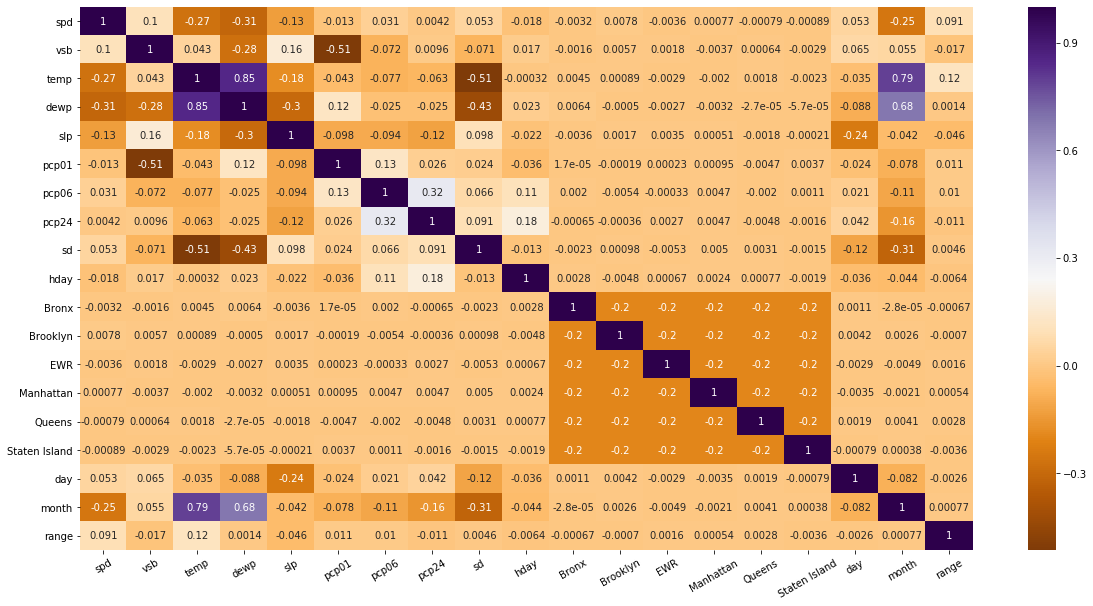

In [ ]:
# Check the mutil-collinearity

corr = X_train.corr()
fig, ax = plt.subplots(figsize=(20,10))
heatmap = sns.heatmap(corr, ax=ax, annot=True, cmap="PuOr")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30)
plt.show()

In [ ]:
# Checking Vif Using list comprehension
from statsmodels.stats.outliers_influence import variance_inflation_factor    
import time

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
#     return X.iloc[:, variables]

start_time = time.time()
calculate_vif_(X_train)
end_time = time.time() 
print("Time taken: %ssecs" % (end_time - start_time))

dropping 'Brooklyn' at index: 11
dropping 'temp' at index: 2
dropping 'vsb' at index: 1
dropping 'dewp' at index: 1
dropping 'slp' at index: 1
Remaining variables:
Index(['spd', 'pcp01', 'pcp06', 'pcp24', 'sd', 'hday', 'Bronx', 'EWR',
       'Manhattan', 'Queens', 'Staten Island', 'day', 'month', 'range'],
      dtype='object')
Time taken: 0.7355661392211914secs


In [ ]:
X_train2=X_train.drop(['dewp', 'vsb', 'slp'], 1)
X_test2=X_test.drop(['dewp', 'vsb', 'slp'], 1)

In [ ]:
#Second round regression

X_train2 = sm.add_constant(X_train2)
lr2 = sm.OLS(Y_train,X_train2).fit()

X_test2 = sm.add_constant(X_test2)
Y_pred = lr2.predict(X_test2) 

display(lr2.summary())

# calculate MAE, MSE, RMSE
print('MAE: ',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))




//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pickups   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2605.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        19:06:38   Log-Likelihood:                 19349.
No. Observations:               16677   AIC:                        -3.867e+04
Df Residuals:                   16661   BIC:                        -3.854e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0027      0.002     -1.087      0.277      -0.008       0.002
spd               0.0062      0.003      1.803      0.071      -0.001       0.013
temp             -0.0110      0.006     -2.001      0.045      -0.022      -0.000
pcp01            -0.0011      0.010     -0.110      0.912      -0.021       0.019
pcp06             0.0141      0.009      1.610      0.107      -0.003       0.031
pcp24            -0.0402      0.006     -6.435      0.000      -0.052      -0.028
sd                0.0101      0.003      3.632      0.000       0.005       0.016
hday              0.0001      0.003      0.036      0.971      -0.006       0.006
Bronx            -0.0660      0.001    -47.878      0.000      -0.069      -0.063
Brooklyn         -0.0037      0.001     -2.657      0.008      -0.006      -0.001
EWR              -0.0723      0.001    -52.694      0.000      -0.075      -0.070
Manhattan         0.2445      0.001    177.527      0.000       0.242       0.247
Queens           -0.0331      0.001    -24.035      0.000      -0.036      -0.030
Staten Island    -0.0720      0.001    -52.214      0.000      -0.075      -0.069
day               0.0004   7.04e-05      5.952      0.000       0.000       0.001
month             0.0057      0.001      7.717      0.000       0.004       0.007
range             0.0123      0.000     46.495      0.000       0.012       0.013
==============================================================================
Omnibus:                     5941.136   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80931.825
Skew:                           1.329   Prob(JB):                         0.00
Kurtosis:                      13.460   Cond. No.                     1.84e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.6e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

MAE:  0.04487280070724755
MSE:  0.0069504688099690775
RMSE:  0.08336947169059594


In [ ]:
#Third round regression

X_train3 = X_train.drop(['dewp', 'vsb', 'slp', 'hday', 'pcp01', 'pcp06'], 1)
X_test3=X_test.drop(['dewp', 'vsb', 'slp', 'hday', 'pcp01', 'pcp06'], 1)

X_train3 = sm.add_constant(X_train3)
lr3 = sm.OLS(Y_train,X_train3).fit()

X_test3 = sm.add_constant(X_test3)
Y_pred = lr3.predict(X_test3) 

display(lr3.summary())

# calculate MAE, MSE, RMSE
print('MAE: ',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))





//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pickups   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     3256.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        22:17:53   Log-Likelihood:                 19347.
No. Observations:               16677   AIC:                        -3.867e+04
Df Residuals:                   16664   BIC:                        -3.857e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0026      0.002     -1.037      0.300      -0.007       0.002
spd               0.0063      0.003      1.828      0.068      -0.000       0.013
temp             -0.0112      0.006     -2.022      0.043      -0.022      -0.000
pcp24            -0.0371      0.006     -6.312      0.000      -0.049      -0.026
sd                0.0102      0.003      3.657      0.000       0.005       0.016
Bronx            -0.0660      0.001    -47.890      0.000      -0.069      -0.063
Brooklyn         -0.0037      0.001     -2.650      0.008      -0.006      -0.001
EWR              -0.0723      0.001    -52.710      0.000      -0.075      -0.070
Manhattan         0.2445      0.001    177.675      0.000       0.242       0.247
Queens           -0.0331      0.001    -24.031      0.000      -0.036      -0.030
Staten Island    -0.0720      0.001    -52.231      0.000      -0.075      -0.069
day               0.0004   7.02e-05      5.975      0.000       0.000       0.001
month             0.0056      0.001      7.717      0.000       0.004       0.007
range             0.0123      0.000     46.527      0.000       0.012       0.013
==============================================================================
Omnibus:                     5955.194   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81215.860
Skew:                           1.333   Prob(JB):                         0.00
Kurtosis:                      13.477   Cond. No.                     2.37e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.59e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

MAE:  0.04487374791246561
MSE:  0.006944698856633554
RMSE:  0.08333485979248753


It is obvious that many features are related to date, such as snow, temperature etc. Since time series analysis will be conducted, I drop the date features and focus on linear relationship between pickups and the rest features.

In [ ]:
# To scale back the Y_pred and check the Metrics
def rev_min_max_func(scaled_val):
    max_val = max(df_baseline['pickups'][math.ceil(df_baseline.shape[0]*0.8)+1 : -1])
    min_val = min(df_baseline['pickups'][math.ceil(df_baseline.shape[0]*0.8)+1 : -1])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val
Y_pred_og = Y_pred.apply(lambda x: rev_min_max_func(x))

In [ ]:
print('MAE: ',metrics.mean_absolute_error(df_baseline['pickups'][math.ceil(df_baseline.shape[0]*0.8)+1 : -1], Y_pred_og))
print('MSE: ',metrics.mean_squared_error(df_baseline['pickups'][math.ceil(df_baseline.shape[0]*0.8)+1 : -1], Y_pred_og))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(df_baseline['pickups'][math.ceil(df_baseline.shape[0]*0.8)+1 : -1], Y_pred_og)))

MAE:  329.41679945211393
MSE:  347775.174426831
RMSE:  589.7246598429059


In [ ]:
# Fit the baseline model without time features
X_train_time = train.drop(['pickups', 'day' ,'month', 'range'],axis=1)
Y_train = train['pickups']
X_val_time = val.drop(['pickups', 'day' ,'month', 'range'],axis=1)
Y_val = val['pickups']
X_test_time = test.drop(['pickups', 'day' ,'month', 'range'],axis=1)
Y_test = test['pickups']


In [ ]:
# Fit the baseline model without time features
#First round regression

X_train1 = sm.add_constant(X_train_time)
lr1 = sm.OLS(Y_train,X_train1).fit()

X_test1 = sm.add_constant(X_test_time)
Y_pred = lr1.predict(X_test1) 

display(lr1.summary())

# calculate MAE, MSE, RMSE
print('MAE: ',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pickups   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     2204.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        19:25:01   Log-Likelihood:                 18397.
No. Observations:               16677   AIC:                        -3.676e+04
Df Residuals:                   16661   BIC:                        -3.664e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0662      0.004     14.732      0.000       0.057       0.075
spd               0.0185      0.004      4.904      0.000       0.011       0.026
vsb              -0.0207      0.003     -5.937      0.000      -0.028      -0.014
temp              0.1225      0.007     17.387      0.000       0.109       0.136
dewp             -0.0890      0.007    -12.711      0.000      -0.103      -0.075
slp              -0.0184      0.004     -4.266      0.000      -0.027      -0.010
pcp01             0.0008      0.013      0.062      0.951      -0.024       0.026
pcp06             0.0213      0.009      2.296      0.022       0.003       0.039
pcp24            -0.0488      0.007     -7.440      0.000      -0.062      -0.036
sd                0.0211      0.003      7.379      0.000       0.016       0.027
hday              0.0002      0.003      0.055      0.956      -0.006       0.006
Bronx            -0.0546      0.002    -34.535      0.000      -0.058      -0.052
Brooklyn          0.0078      0.002      4.925      0.000       0.005       0.011
EWR              -0.0607      0.002    -38.503      0.000      -0.064      -0.058
Manhattan         0.2559      0.002    162.279      0.000       0.253       0.259
Queens           -0.0215      0.002    -13.655      0.000      -0.025      -0.018
Staten Island    -0.0606      0.002    -38.348      0.000      -0.064      -0.058
==============================================================================
Omnibus:                     5803.928   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97379.462
Skew:                           1.227   Prob(JB):                         0.00
Kurtosis:                      14.581   Cond. No.                     1.56e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.93e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

MAE:  0.0420259195450717
MSE:  0.00800736229654815
RMSE:  0.08948386612428047


Without date features, we got a clearer map of how currently kept features (weather conditions and regions) influence pickups. Only slp(sea level pressure), pcp01 and pcp06 are statistially insignificant within the alpha=0.05. Now let's refine the model.

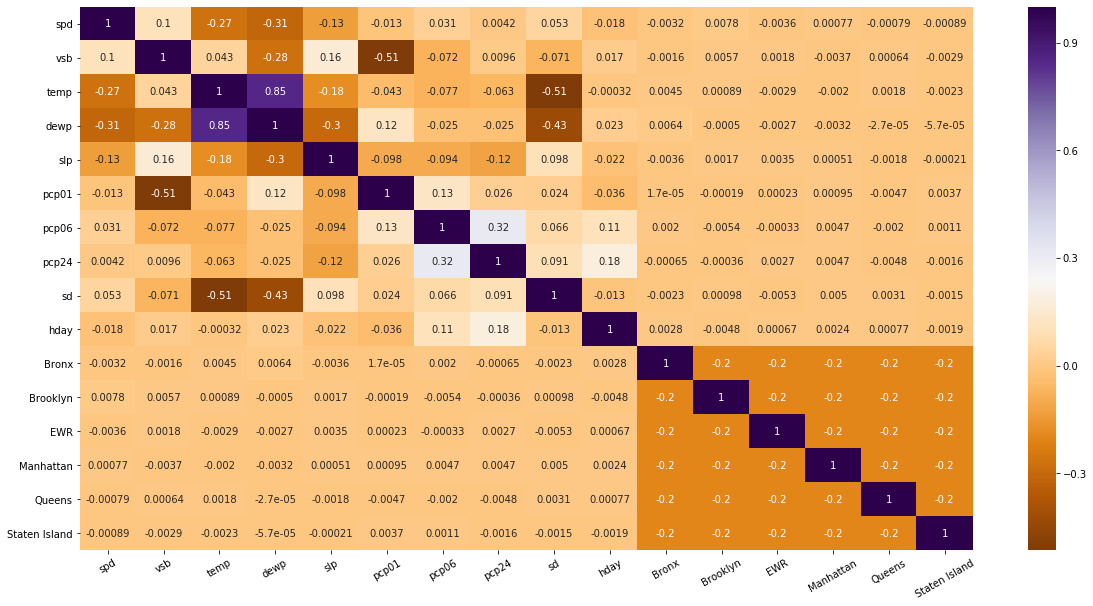

In [ ]:
# Check the mutil-collinearity
corr = X_train_time.corr()
fig, ax = plt.subplots(figsize=(20,10))
heatmap = sns.heatmap(corr, ax=ax, annot=True, cmap="PuOr")
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=30)
plt.show()

In [ ]:
# Check Vif
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

calculate_vif_(X_train_time)

dropping 'Brooklyn' at index: 11
dropping 'temp' at index: 2
dropping 'vsb' at index: 1
dropping 'slp' at index: 2
Remaining variables:
Index(['spd', 'dewp', 'pcp01', 'pcp06', 'pcp24', 'sd', 'hday', 'Bronx', 'EWR',
       'Manhattan', 'Queens', 'Staten Island'],
      dtype='object')


,spd,dewp,pcp01,pcp06,pcp24,sd,hday,Bronx,EWR,Manhattan,Queens,Staten Island
22524,0.238095,0.609756,0.0,0.143145,0.000000,0.000000,0,0,0,0,1,0
12674,0.000000,0.500000,0.0,0.000000,0.190476,0.000000,0,0,0,0,0,1
11490,0.238095,0.500000,0.0,0.000000,0.004762,0.118421,0,0,0,1,0,0
18686,0.238095,0.609756,0.0,0.000000,0.503333,0.000000,0,1,0,0,0,0
17287,0.380952,0.487805,0.0,0.000000,0.000000,0.000000,0,0,1,0,0,0
2729,0.142857,0.451220,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0
11213,0.761905,0.463415,0.0,0.000000,0.000000,0.298246,0,0,0,0,0,0
3843,0.333333,0.487805,0.0,0.194892,0.271429,0.153509,0,0,0,0,1,0
20686,0.000000,0.926829,0.0,0.000000,0.000000,0.000000,1,0,0,0,0,1
6704,0.142857,0.402439,0.0,0.000000,0.042857,0.421053,1,0,0,1,0,0


In [ ]:
# Drop dewp, pcp01, hday, sd
X_train2=X_train_time.drop(['dewp', 'vsb', 'pcp01', 'sd', 'hday', 'slp'], 1)
X_test2=X_test_time.drop(['dewp', 'vsb', 'pcp01', 'sd', 'hday', 'slp'], 1)

In [ ]:
X_train2 = sm.add_constant(X_train2)
lr2 = sm.OLS(Y_train,X_train2).fit()

X_test2 = sm.add_constant(X_test2)
Y_pred = lr2.predict(X_test2) 

display(lr2.summary())

# calculate MAE, MSE, RMSE
print('MAE: ',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                pickups   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     3600.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        22:14:15   Log-Likelihood:                 18283.
No. Observations:               16677   AIC:                        -3.655e+04
Df Residuals:                   16667   BIC:                        -3.647e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0433      0.002     22.887      0.000       0.040       0.047
spd               0.0248      0.004      6.886      0.000       0.018       0.032
temp              0.0327      0.003     10.309      0.000       0.026       0.039
pcp06             0.0215      0.009      2.326      0.020       0.003       0.040
pcp24            -0.0477      0.006     -7.387      0.000      -0.060      -0.035
Bronx            -0.0585      0.001    -40.702      0.000      -0.061      -0.056
Brooklyn          0.0040      0.001      2.763      0.006       0.001       0.007
EWR              -0.0646      0.001    -45.124      0.000      -0.067      -0.062
Manhattan         0.2522      0.001    175.853      0.000       0.249       0.255
Queens           -0.0252      0.001    -17.587      0.000      -0.028      -0.022
Staten Island    -0.0645      0.001    -44.890      0.000      -0.067      -0.062
==============================================================================
Omnibus:                     5939.707   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           100962.245
Skew:                           1.263   Prob(JB):                         0.00
Kurtosis:                      14.786   Cond. No.                     9.68e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.66e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

MAE:  0.042214028533980666
MSE:  0.007981503135886227
RMSE:  0.08933925864862674


Features positively influence the pickup amounts are:
    windspeed, temperature, snow depth, Brooklyn, Manhattan and Queens, meaning that with higher windspeed, temperature, snow depth, or when place is in Brooklyn, Manhattan and Queens we expect higher amount of pickups.
Vice Versa with the rest features.

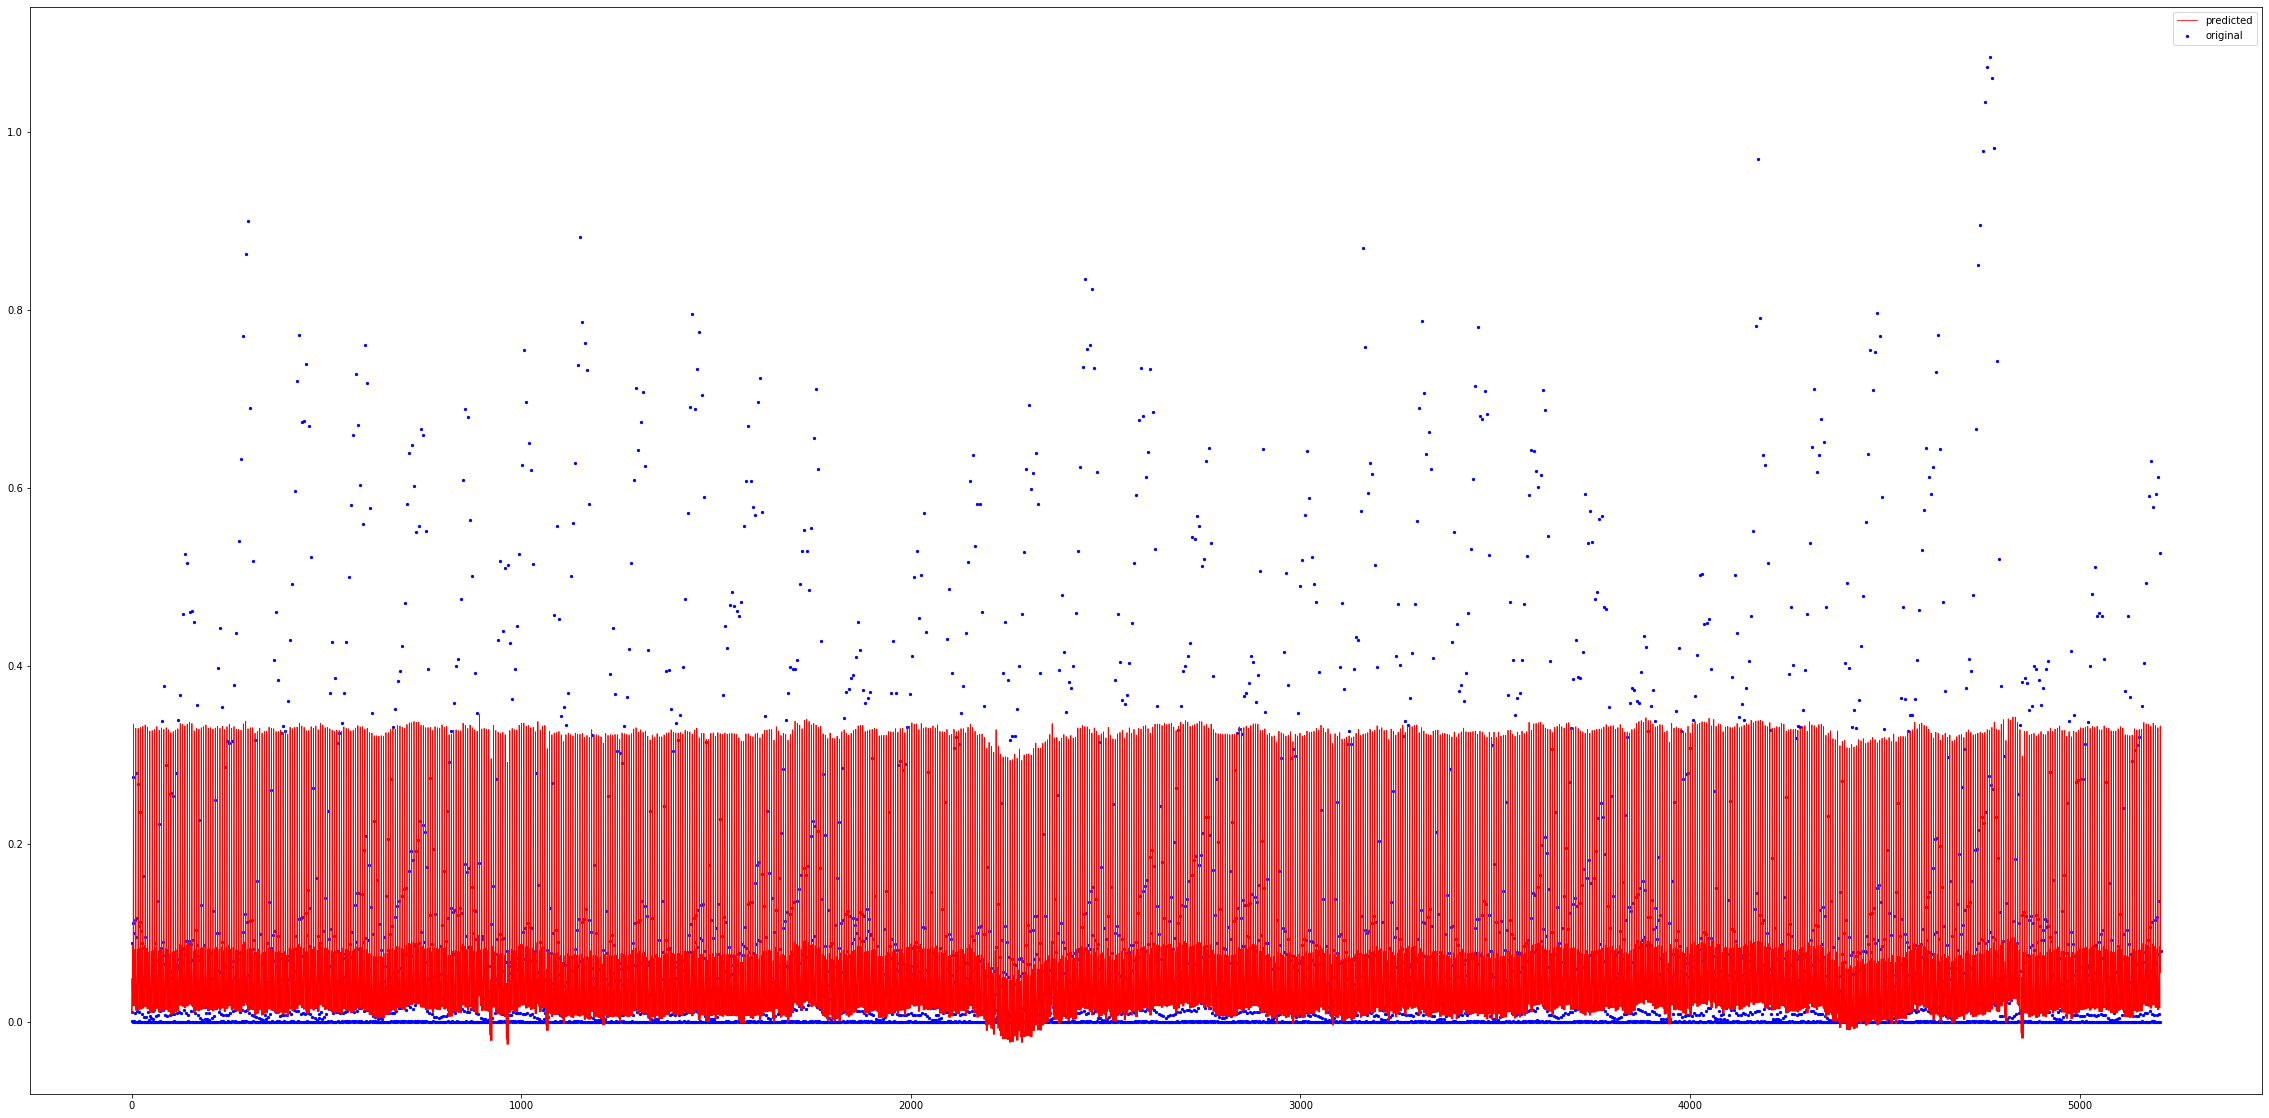

In [ ]:
x_ax = range(len(X_test2))
plt.figure(figsize=(40,20))
plt.scatter(x_ax, Y_test, s=5, color="blue", label="original")
plt.plot(x_ax, Y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

Based on the summary, the F statistics goes down a little bit, meaning that the model explanation becomes worse. However, PCP01 is positively related with pickups, which is contrary to PCP24. It is possible to conclude that when there is precipitation in one hour, an increase in pickups amount is expected. However, when there is precipitaion on that day in 24 hours, the pickups amount will experience a decrease. It makes sense given that one is willing to get a uber if it suddenly rains, but not willing to go out if it has rained for hours on that day.

### Elastic net model

In [ ]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Elastic net with time date
X_train = train.drop(['pickups'],axis=1)
Y_train = train['pickups']
X_val = val.drop(['pickups'],axis=1)
Y_val = val['pickups']
X_test = test.drop(['pickups'],axis=1)
Y_test = test['pickups']

In [ ]:
# Alpha search using MPI

# Save data to csv
X_train.to_csv ('X_train.csv', index = False, header=True)
Y_train.to_csv ('Y_train.csv', index = False, header=True)
X_val.to_csv ('X_val.csv', index = False, header=True)
Y_val.to_csv ('Y_val.csv', index = False, header=True)
X_test.to_csv ('X_test.csv', index = False, header=True)
Y_test.to_csv ('Y_test.csv', index = False, header=True)

In [ ]:
%%writefile Grid_MPI.py

import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet,ElasticNetCV
from sklearn.metrics import mean_squared_error
from mpi4py import MPI

comm = MPI.COMM_WORLD
rank = comm.Get_rank()
size = comm.Get_size()

X_train=pd.read_csv('X_train.csv')
Y_train=pd.read_csv('Y_train.csv')
X_val=pd.read_csv('X_val.csv')
Y_val=pd.read_csv('Y_val.csv')
X_test=pd.read_csv('X_test.csv')
Y_test=pd.read_csv('Y_test.csv')

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

if rank==0:
    data=np.array(alphas)
    data=data.reshape(size, int(len(np.array(alphas))/size))

else:
    data=None
    
recvbuf = np.empty(int(len(np.array(alphas))/size))
comm.Scatter(data,recvbuf, root = 0)

model = ElasticNet(alpha=recvbuf).fit(X_train,Y_train)   
pred_y = model.predict(X_val)
score = model.score(X_val, Y_val)
mse = mean_squared_error(Y_val, pred_y)   
# print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
#    .format(recvbuf, score, mse, np.sqrt(mse)))
print(rank, 'Alpha:',recvbuf, 'R2:', score, 'MSE:',mse , 'RMSE:', np.sqrt(mse))


Overwriting Grid_MPI.py


In [ ]:
!mpirun -n 8 --oversubscribe python3 Grid_MPI.py

7 Alpha: [1.] R2: -0.00016441135287426079 MSE: 0.018212651556872437 RMSE: 0.13495425727583565
5 Alpha: [0.5] R2: -0.00016441135287426079 MSE: 0.018212651556872437 RMSE: 0.13495425727583565
4 Alpha: [0.3] R2: -0.00016441135287426079 MSE: 0.018212651556872437 RMSE: 0.13495425727583565
1 Alpha: [0.001] R2: 0.7019064348633046 MSE: 0.005428181778470645 RMSE: 0.07367619546685786
2 Alpha: [0.01] R2: 0.6633412530621469 MSE: 0.006130440537529924 RMSE: 0.07829712981667926
3 Alpha: [0.1] R2: 0.015966563798296862 MSE: 0.017918912021286027 RMSE: 0.13386154048600377
6 Alpha: [0.7] R2: -0.00016441135287426079 MSE: 0.018212651556872437 RMSE: 0.13495425727583565
0 Alpha: [0.0001] R2: 0.7025154834546692 MSE: 0.005417091212109936 RMSE: 0.07360089138121859
[Zhangs-MBP.fios-router.home:01357] PMIX ERROR: ERROR in file gds_ds12_lock_pthread.c at line 206
[Zhangs-MBP.fios-router.home:01364] PMIX ERROR: ERROR in file gds_ds12_lock_pthread.c at line 206
[Zhangs-MBP.fios-router.home:01362] PMIX ERROR: ERROR in 

In [ ]:
# Alpha Search Using Pool
from multiprocessing.pool import Pool

def EN_Best_alpha(a):
    model = ElasticNet(alpha=a).fit(X_train,Y_train)   
    pred_y = model.predict(X_val)
    score = model.score(X_val, Y_val)
    mse = mean_squared_error(Y_val, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.4f}, MSE:{2:.4f}, RMSE:{3:.4f}"
       .format(a, score, mse, np.sqrt(mse)))

In [ ]:
start_time = time.time()
with Pool(8) as pool:
    result = pool.map(EN_Best_alpha,list(np.linspace(0.0001, 0.02, 20)))
    
end_time = time.time() 
print("Time taken: %ssecs" % (end_time - start_time))

Alpha:0.0022, R2:0.7001, MSE:0.0055, RMSE:0.0739
Alpha:0.0053, R2:0.6890, MSE:0.0057, RMSE:0.0753
Alpha:0.0043, R2:0.6938, MSE:0.0056, RMSE:0.0747
Alpha:0.0064, R2:0.6831, MSE:0.0058, RMSE:0.0760
Alpha:0.0085, R2:0.6719, MSE:0.0060, RMSE:0.0773
Alpha:0.0116, R2:0.6531, MSE:0.0063, RMSE:0.0795
Alpha:0.0106, R2:0.6599, MSE:0.0062, RMSE:0.0787
Alpha:0.0095, R2:0.6661, MSE:0.0061, RMSE:0.0780
Alpha:0.0074, R2:0.6779, MSE:0.0059, RMSE:0.0766
Alpha:0.0127, R2:0.6474, MSE:0.0064, RMSE:0.0801
Alpha:0.0137, R2:0.6436, MSE:0.0065, RMSE:0.0806
Alpha:0.0158, R2:0.6353, MSE:0.0066, RMSE:0.0815
Alpha:0.0148, R2:0.6395, MSE:0.0066, RMSE:0.0810
Alpha:0.0169, R2:0.6309, MSE:0.0067, RMSE:0.0820
Alpha:0.0179, R2:0.6263, MSE:0.0068, RMSE:0.0825
Alpha:0.0190, R2:0.6214, MSE:0.0069, RMSE:0.0830
Alpha:0.0200, R2:0.6163, MSE:0.0070, RMSE:0.0836
Alpha:0.0032, R2:0.6975, MSE:0.0055, RMSE:0.0742
Alpha:0.0011, R2:0.7017, MSE:0.0054, RMSE:0.0737
Alpha:0.0001, R2:0.7025, MSE:0.0054, RMSE:0.0736
Time taken: 0.351124

We can see the best alpha is around 0.0011. Now we search for the best lambda.

In [ ]:
# Lambda searching
alpha=0.0011
l1_ratio=list(np.linspace(0.1, 1, 5))
for i in l1_ratio:
    model = ElasticNet(alpha=alpha, l1_ratio=i).fit(X_train,Y_train)   
    pred_y = model.predict(X_val)
    score = model.score(X_val, Y_val)
    mse = mean_squared_error(Y_val, pred_y)   
    print("Alpha:{0:.4f}, lambda:{1:.2f}, R2:{2:.4f}, MSE:{3:.4f}, RMSE:{4:.4f}"
       .format(alpha, i, score, mse, np.sqrt(mse)))



Alpha:0.0011, lambda:0.10, R2:0.7028, MSE:0.0054, RMSE:0.0736
Alpha:0.0011, lambda:0.33, R2:0.7023, MSE:0.0054, RMSE:0.0736
Alpha:0.0011, lambda:0.55, R2:0.7016, MSE:0.0054, RMSE:0.0737
Alpha:0.0011, lambda:0.78, R2:0.7009, MSE:0.0054, RMSE:0.0738
Alpha:0.0011, lambda:1.00, R2:0.7001, MSE:0.0055, RMSE:0.0739


Chose the value: alpha 0.0011, lambda 0.1

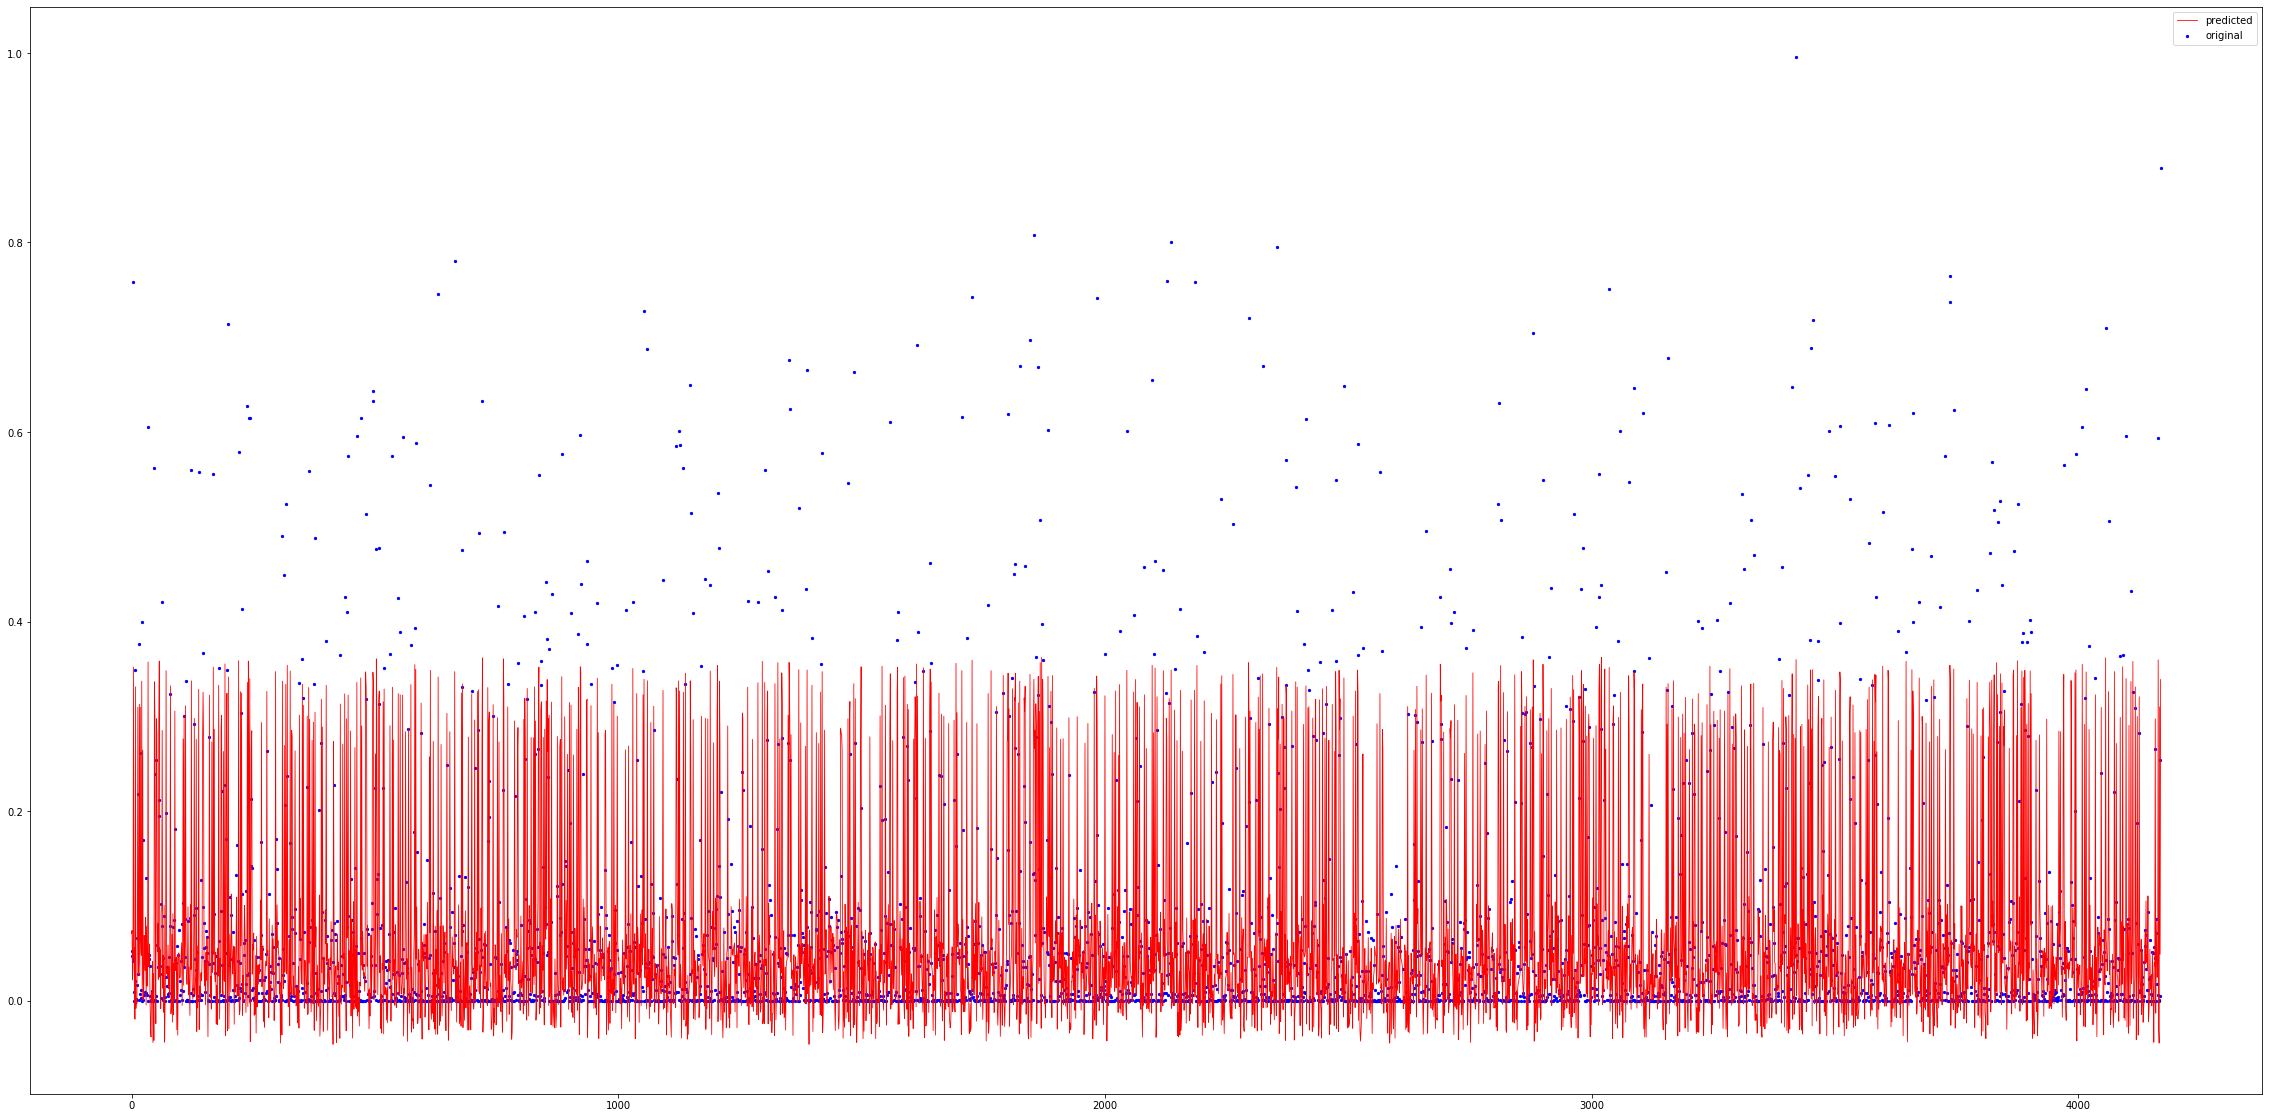

In [ ]:
x_ax = range(len(X_val))
plt.figure(figsize=(40,20))
plt.scatter(x_ax, Y_val, s=5, color="blue", label="original")
plt.plot(x_ax, pred_y, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [ ]:
alpha=0.0011
l1=0.1
model = ElasticNet(alpha=alpha, l1_ratio=l1).fit(X_train,Y_train)   
pred_y = model.predict(X_test)
score = model.score(X_test, Y_test)
mse = mean_squared_error(Y_test, pred_y)   
print("Alpha:{0:.4f}, lambda:{1:.2f}, R2:{2:.4f}, MSE:{3:.4f}, RMSE:{4:.4f}"
   .format(alpha, l1, score, mse, np.sqrt(mse)))



Alpha:0.0011, lambda:0.10, R2:0.7246, MSE:0.0070, RMSE:0.0836


In [ ]:
coef_dict_baseline = {}
for coef, feat in zip(model.coef_,X_train.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'spd': 0.00227352420869951,
 'vsb': 0.0,
 'temp': -0.0,
 'dewp': -0.00891697078909031,
 'slp': -0.0,
 'pcp01': 0.0,
 'pcp06': 0.0,
 'pcp24': -0.023964404904429866,
 'sd': 0.008425801795421935,
 'hday': -0.0,
 'Bronx': -0.03258575061622929,
 'Brooklyn': 0.028111867915252612,
 'EWR': -0.03887475740313736,
 'Manhattan': 0.27480260095218745,
 'Queens': -0.0,
 'Staten Island': -0.03848110202495794,
 'day': 0.0003918641375744425,
 'month': 0.005109977583957104,
 'range': 0.01223165845629436}

In [ ]:
# To scale back the Y_pred and check the Metrics
def rev_min_max_func(scaled_val):
    max_val = max(df_baseline['pickups'][math.ceil(df_baseline.shape[0]*0.8)+1 : -1])
    min_val = min(df_baseline['pickups'][math.ceil(df_baseline.shape[0]*0.8)+1 : -1])
    og_val = (scaled_val*(max_val - min_val)) + min_val
    return og_val
Y_pred_og = pd.DataFrame(pred_y).apply(lambda x: rev_min_max_func(x))

In [ ]:
print('MAE: ',metrics.mean_absolute_error(df_baseline['pickups'][math.ceil(df_baseline.shape[0]*0.8)+1 : -1], Y_pred_og))
print('MSE: ',metrics.mean_squared_error(df_baseline['pickups'][math.ceil(df_baseline.shape[0]*0.8)+1 : -1], Y_pred_og))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(df_baseline['pickups'][math.ceil(df_baseline.shape[0]*0.8)+1 : -1], Y_pred_og)))

MAE:  327.9530824413242
MSE:  348526.4280426649
RMSE:  590.3612690909397
